http://www.astronomy.ohio-state.edu/~martini/usefuldata.html



In [88]:
import speclite.filters
from astropy.table import Table
from matplotlib import pyplot as plt
import os
from astropy import units as u
from astropy import constants as c
import numpy as np

In [4]:
homedir = os.getenv("HOME")
specdir = homedir+'/siena/courses/ASTR380/spectroscopy/TEXT/'

In [5]:
os.chdir(specdir)

In [6]:
astar = Table.read('95418.txt',format='ascii')

In [82]:
rband = speclite.filters.load_filter('sdss2010-r')
gband = speclite.filters.load_filter('sdss2010-g')
Bband = speclite.filters.load_filter('bessell-B')
Vband = speclite.filters.load_filter('bessell-V')

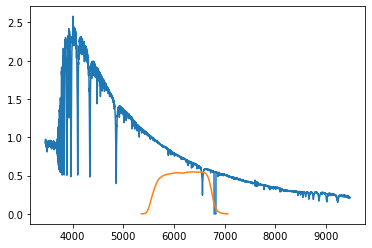

In [25]:
plt.figure()
plt.plot(astar['col1'],astar['col2'])
plt.plot(rband.wavelength,rband.response)

In [69]:
def convert_to_Fnu(wavelength,Flambda):
    '''
    wavelength in angstrom (no units attached), Flambda in erg/s/cm2/AA 
    '''
    # Fnu = Flambda*c/nu**2
    flambda_unit = u.erg/u.s/u.cm**2/u.AA
    nu = c.c/(wavelength*u.AA)
    #print(nu)
    Fnu = Flambda*flambda_unit*c.c/nu**2
    return Fnu,nu

In [19]:
fluxunit = u.erg/u.s/u.cm**2/u.AA

In [29]:
astarwave = speclite.filters.validate_wavelength_array(astar['col1']*u.AA)
print(len(astarwave),len(astar['col1']))

15011 15011


In [70]:
astar_fnu,nu = convert_to_Fnu(astarwave,astar['col2'])

In [61]:
fnu_unit = u.erg/u.s/u.cm**2/u.Hz

In [67]:
astar_fnu.to(fnu_unit)

<Quantity [3.74375528e-12, 3.72481596e-12, 3.72445626e-12, ...,
           6.46864066e-12, 6.42009275e-12, 6.25254782e-12] erg / (cm2 Hz s)>

In [73]:
nu

<Quantity [86520.18989899, 86510.20315115, 86500.21870852, ...,
           31663.08886589, 31661.7479182 , 31660.41377125] m / (Angstrom s)>

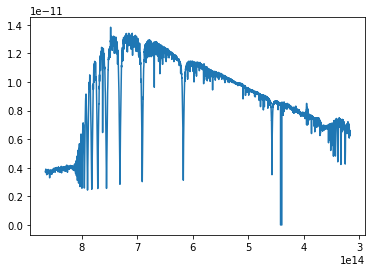

In [74]:
plt.figure()
plt.plot(nu.to(u.Hz),astar_fnu.to(fnu_unit))
plt.gca().invert_xaxis()

In [100]:
astar_flux = rband.convolve_with_array(astarwave*u.AA,astar['col2']*fluxunit,units=fluxunit,photon_weighted=False)
print(astar_flux)

452.0471692494409 erg / (cm2 s)


In [108]:
fake_flux = np.ones(len(astarwave),'d')
ff = rband.convolve_with_array(astarwave*u.AA,fake_flux,photon_weighted=False)

In [109]:
ff

620.1299994999999

In [110]:
astar_integral = astar_flux/(ff*u.AA)

In [111]:
astar_integral

<Quantity 0.72895549 erg / (Angstrom cm2 s)>

In [112]:
rband.effective_wavelength

<Quantity 6197.68650753 Angstrom>

In [113]:
fnu_rband = astar_integral*(rband.effective_wavelength**2)/c.c

In [115]:
fnu_rband.to(fnu_unit)

<Quantity 9.33984179e-12 erg / (cm2 Hz s)>

In [93]:
astar_flux

<Quantity 1.39121842e+14 1 / (cm2 s)>

In [121]:
# convert to AB mag
# 3631 Jy = 3631e-23 erg/s/cm^2/Hz
flux_zeropoint = 3631e-23*fnu_unit
astar_abmag = -2.5*np.log10(fnu_rband.to(fnu_unit)/flux_zeropoint)

In [122]:
astar_abmag

<Quantity -21.02578318>

In [41]:
r_flux = rband.convolve_with_array(astarwave*u.AA,astar['col2']*fluxunit,units=fluxunit)
g_flux = gband.convolve_with_array(astarwave*u.AA,astar['col2']*fluxunit,units=fluxunit)

In [ ]:
2.5*np.log10(r_flux/g_flux)

In [86]:
t = rband.convolve_with_array(astarwave*u.AA,astar_fnu*fnu_unit,units=fnu_unit)

ValueError: Values units Angstrom erg2 / (cm4 Hz m s) not convertible to erg / (cm2 Hz s).

In [123]:
r_abmag = rband.get_ab_magnitude(astar['col2']*fluxunit,wavelength=astarwave*u.AA)
g_abmag = gband.get_ab_magnitude(astar['col2']*fluxunit,wavelength=astarwave*u.AA)
print(g_abmag-r_abmag)
print(r_abmag)

-0.2390867467891482
-21.004181638832186


In [83]:
B_abmag = Bband.get_ab_magnitude(astar['col2']*fluxunit,wavelength=astarwave*u.AA)
V_abmag = Vband.get_ab_magnitude(astar['col2']*fluxunit,wavelength=astarwave*u.AA)
print(B_abmag-V_abmag)

-0.10252219097365511


In [84]:
# does not work
r_abmag = rband.get_ab_magnitude(astar_fnu*fnu_unit,wavelength=astarwave*u.AA)
g_abmag = gband.get_ab_magnitude(astar_fnu*fnu_unit,wavelength=astarwave*u.AA)
print(g_abmag-r_abmag)

ValueError: Values units Angstrom erg2 / (cm4 Hz m s) not convertible to erg / (Angstrom cm2 s).